# Получаем все данные из таблицы

✍ Как вы помните, данные в БД хранятся в таблицах. В этом модуле мы будем работать с таблицей kinopoisk: она содержит данные о 250 лучших фильмах по версии сервиса «Кинопоиск» (рейтинг собран в мае 2020 года).

Давайте посмотрим на таблицу kinopoisk и изучим, какие данные в ней хранятся:

Название поля	Содержимое\
position	номер в базе данных\
movie_title	название фильма\
year	год выпуска\
country	страна выпуска\
rating	рейтинг фильма в базе\
overview	описание фильма

Попробуйте в Metabase!

SELECT *\
FROM sql.kinopoisk

В результате вы увидите всё содержимое таблицы.

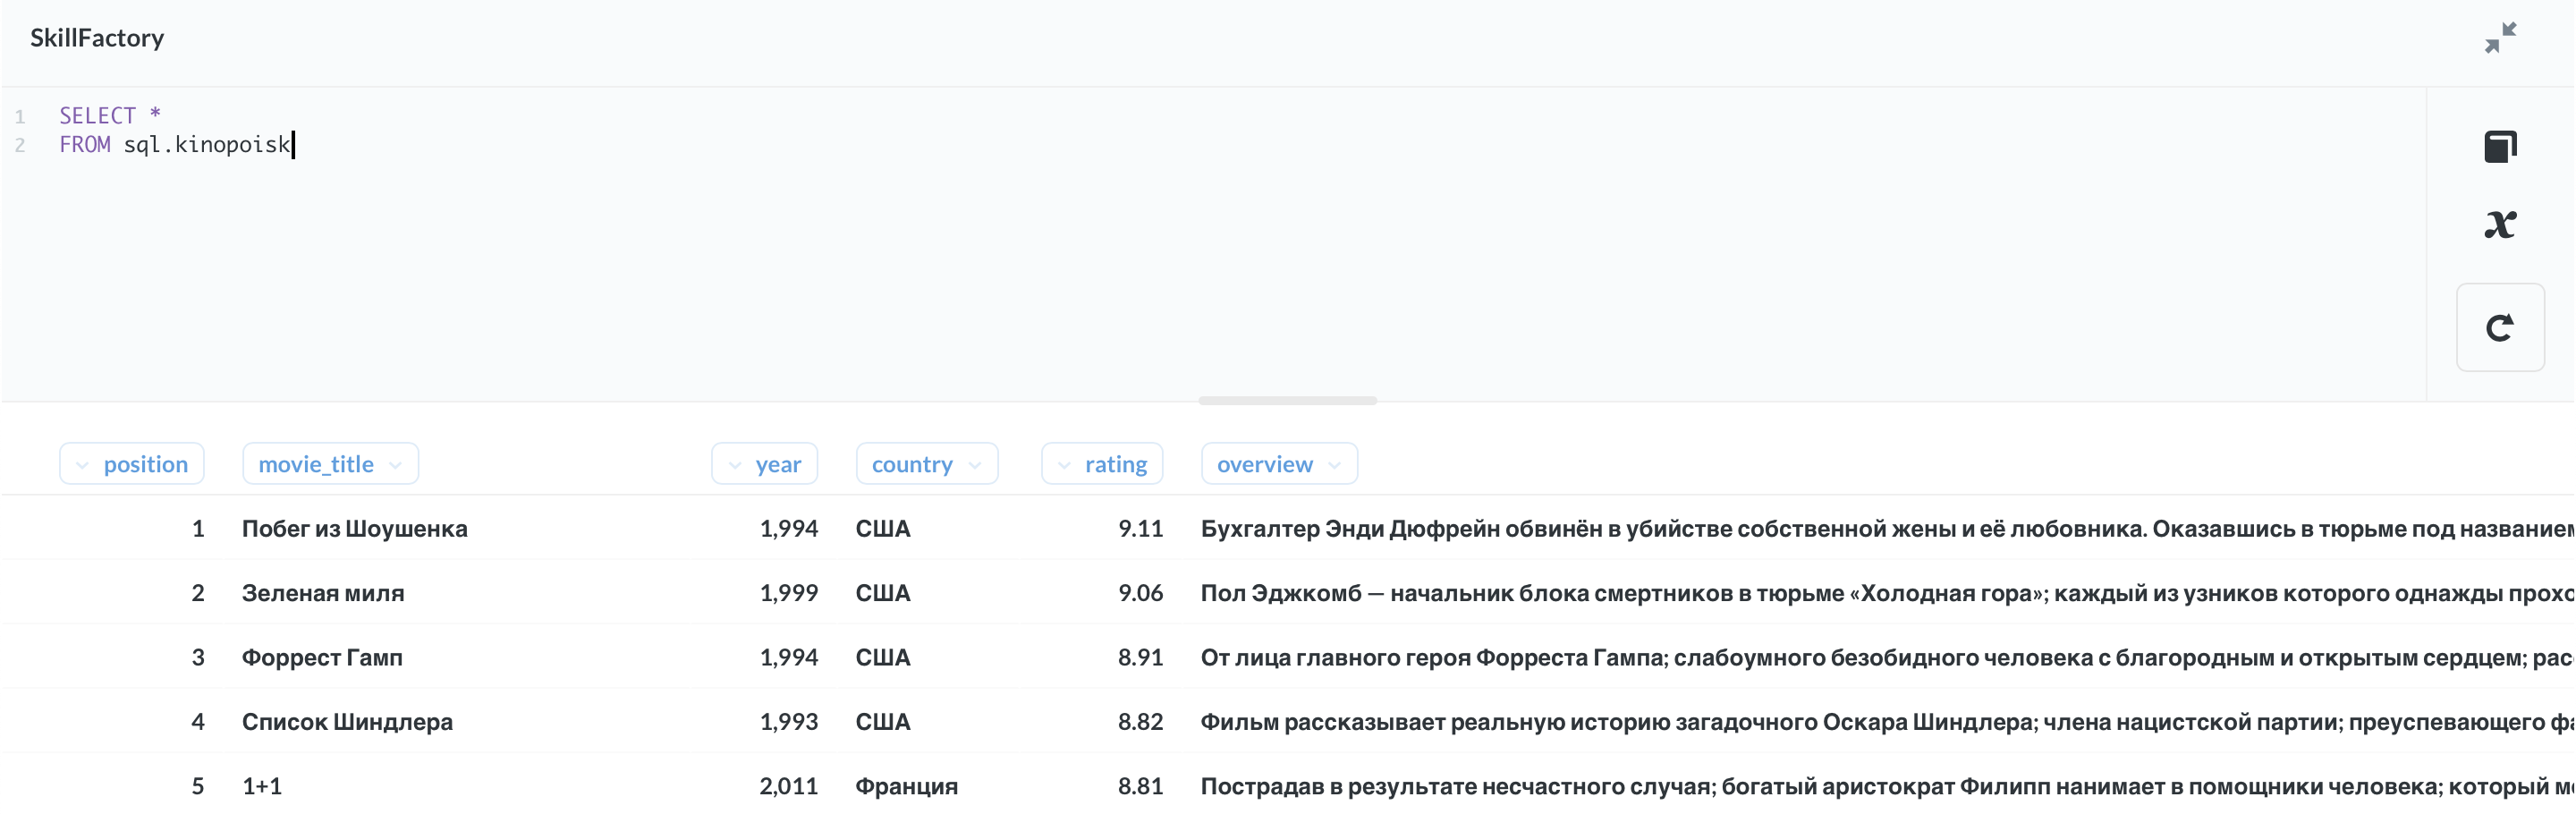

Обратите внимание! Metabase выводит только первые 2 000 строк: в нашем случае таблица полностью уместилась в выводе.
При этом отображена только часть вывода, поскольку не все строки и столбцы влезли на экран. Вы можете увидеть всё содержимое таблицы, прокрутив страницу по вертикали и горизонтали.

Что ещё мы видим? Числа отображаются в американском формате (с десятичным разделителем — точкой и разделителем разрядов — запятой).

Теперь давайте разберём запрос, благодаря которому мы получили такой результат.

Разбираем запрос

→ Оператор SELECT сообщает СУБД, что вы хотите извлечь из неё данные. SELECT лежит в основе любого SQL-запроса к БД.

→ FROM sql.kinopoisk сообщает, из какой таблицы извлекаются данные. Сначала указывается название схемы, в которой содержится таблица (в нашем случае — это sql), а после точки — название самой таблицы (kinopoisk).

→ Звёздочка * указывает, что вы хотите видеть все столбцы этой таблицы.

Если же вам нужны не все столбцы, а только некоторые, вместо звёздочки перечислите названия всех интересующих вас столбцов через запятую.

Важно! SQL нечувствителен к регистру, поэтому ключевые слова можно писать хоть строчными, хоть прописными буквами: SELECT, select или SeLeCt.

---

Задача

Напишите запрос, который выведет из таблицы kinopoisk столбцы с названием фильма, годом его выпуска и рейтингом.

SELECT movie_title, year, rating\
FROM sql.kinopoisk

---

Независимо от того, в каком порядке представлены столбцы в таблице, в запросе вы можете указывать их в любой очерёдности.

Порядок столбцов в выводе будет совпадать с их расположением после оператора SELECT.
Проведём несколько математических операций с нашим выводом.

Попробуйте в Metabase!

Допустим, вы хотите написать запрос, аналогичный запросу из задания, только вместо года выхода фильма, вам нужен его «возраст» на 2020 год.

В таком случае наш запрос будет выглядеть так:

Запрос

SELECT\
      movie_title,\
      2020 - year,\
      rating\
  FROM sql.kinopoisk\

Детализация

SELECT /*выбор столбцов*/\
    movie_title, /*столбец movie_title*/\
    2020 - year, /*столбец, каждое из значений которого ровно разнице 2020 и соответствующего значения столбца year*/\
    rating /*столбец rating*/\
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

То есть мы отняли от 2020 года год выхода фильма и получили его возраст! Элементарно!

---

Задача

Напишите запрос, который выведет из таблицы kinopoisk следующие столбцы:

имя режиссёра (director),\
название фильма (movie_title),\
разница между максимально возможным рейтингом (10) и рейтингом этого фильма.\


select \
      director,\
      movie_title,\
      10 - rating\
from sql.kinopoisk\

Что мы видим?
Столбец с вычислениями в выводе называется ?column?, потому что Metabase не смог подобрать для него название.

Давайте наведём порядок и переименуем столбец!

Попробуйте в Metabase.

Для этого используем ключевое слово AS и поставим после него новое имя difference. Можем повторить этот процесс для каждого столбца.

Запрос

SELECT\
        director,\
        movie_title,\
        10 - rating AS difference\
    FROM sql.kinopoisk
    
Детализация

SELECT /*выбрать столбцы*/\
        director, /*столбец director*/\
        movie_title, /*столбец movie_title*/\
        10 - rating AS difference /*столбец, значения в котором равны разнице 10 и каждого соответствующего значения столбца rating; присвоить столбцу алиас difference*/\
    FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
    

Новое имя является просто псевдонимом, или алиасом, — оно временное и не меняет реального имени столбца в базе данных. Алиас влияет только на то, как столбец отображается в выводе конкретного запроса.

Алиас — имя, назначенное источнику данных в запросе при использовании выражения в качестве источника данных или для упрощения ввода и прочтения инструкции SQL. Алиасом может быть как одно слово, так и несколько, а его написание — как латиницей, так и кириллицей.

Обратите внимание! Если в алиасе используются пробелы, необходимо заключать весь псевдоним в двойные кавычки, например, movie_title AS "Movie Title".

### Простые операции с данными
Со столбцами, которые содержат числовые данные, можно проводить арифметические операции:

* сложение с помощью + ;
* вычитание с помощью - (этот тип операции вы уже проводили, когда определяли «возраст» фильма);
* умножение с помощью * ;
* деление с помощью / ;

Важно! Если и числитель, и знаменатель — целые числа, результат деления также будет целочисленным, то есть этот оператор произведёт деление нацело.

* получение остатка от деления с помощью % .

---

Задача 

Напишите запрос, который выведет столбцы с именем режиссёра, названием фильма, рейтингом по 100-балльной шкале (столбец rating_100). Рейтинг по 100-балльной шкале определите как оценку по 10-балльной, умноженную на 10.

SELECT\
      director,\
      movie_title,\
      rating * 10 AS rating_100\
from sql.kinopoisk

---

⚡ Важно! Если платформа не принимает ваш вариант кода, обращайте внимание на выпадающий пункт меню See full output: там иногда могут быть подсказки о причине ошибки.

### Как пользоваться
Вы отправили код на проверку, и платформа сообщает, что он не верен. Нажмите на See full output в правом нижнем углу:

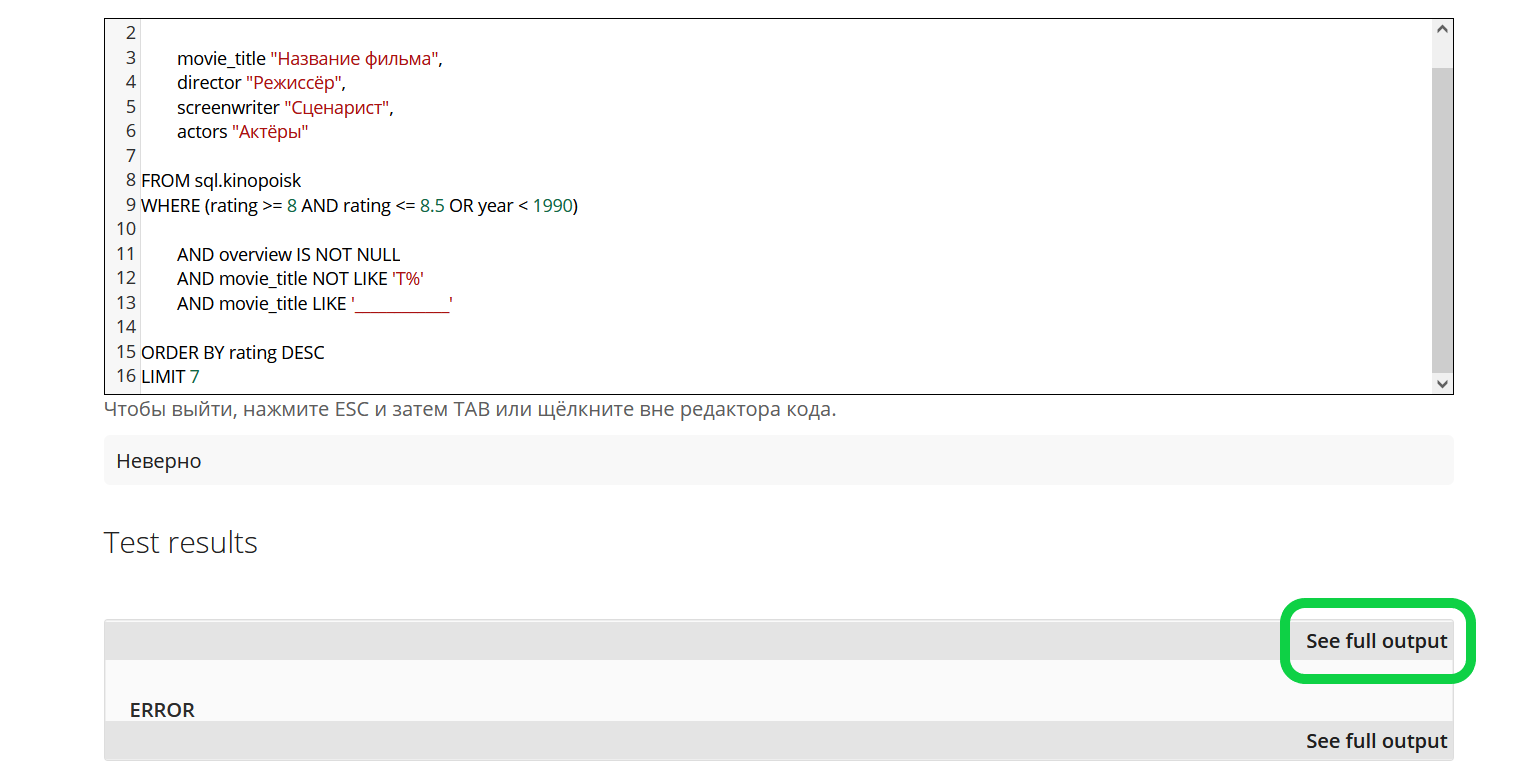

В данном случае причина ошибки — отсутствие обязательной функции:

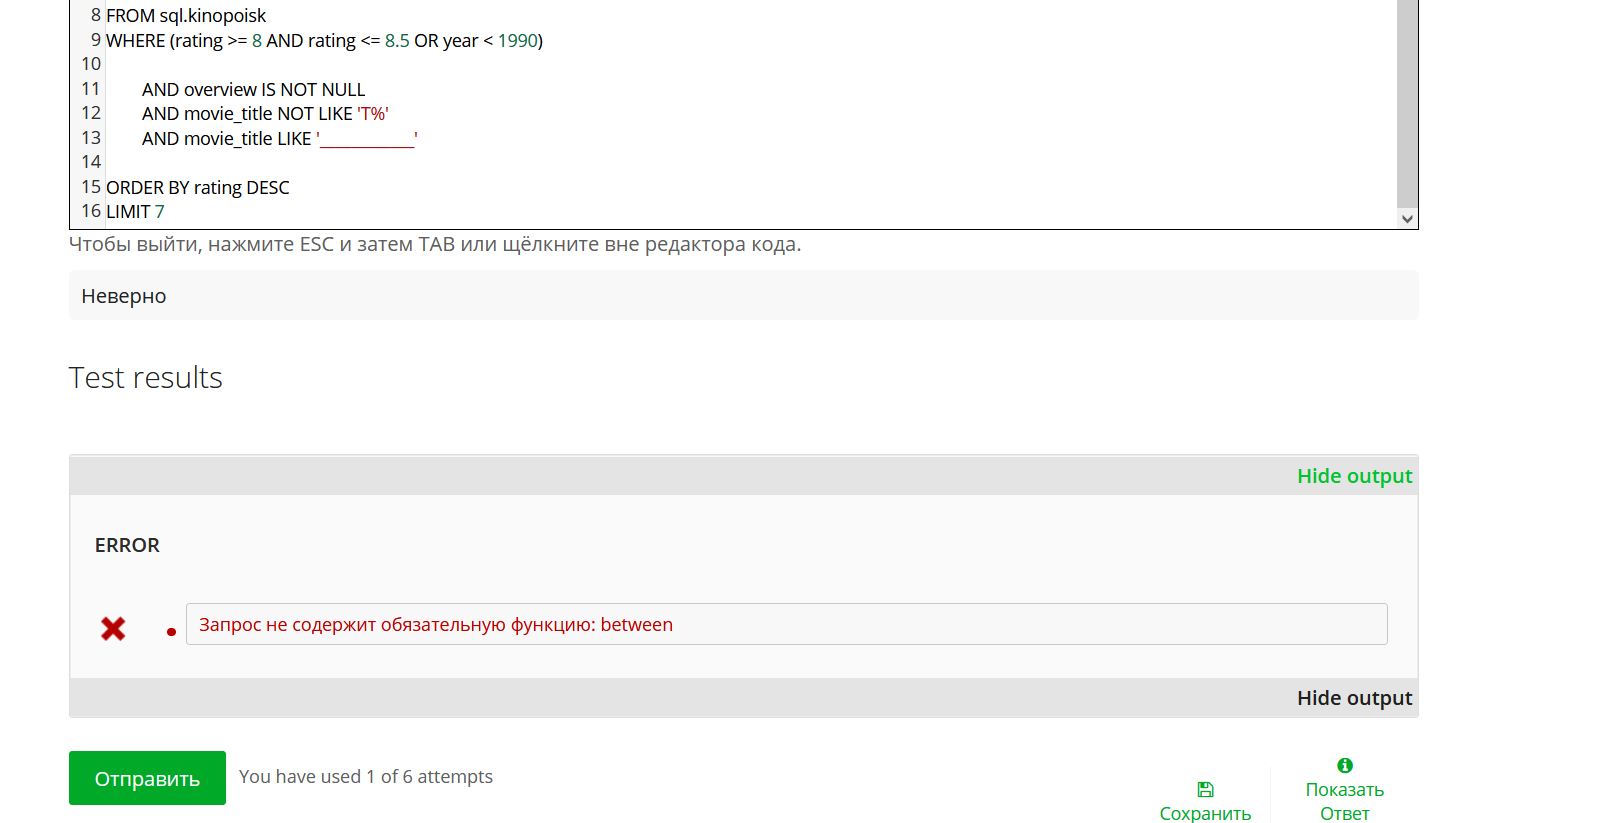

Также мы можем проводить арифметические операции с несколькими столбцами.

Попробуйте в Metabase!

Давайте выведем для каждого фильма результат деления года его выпуска на рейтинг (что бы это ни значило :)).

Запрос

SELECT\
          movie_title,\
          year / rating\
      FROM sql.kinopoisk\
      
Детализация

SELECT /*выбрать столбцы*/\
          movie_title, /*столбец movie_title*/\
          year / rating /*столбец, значения которого равны результату деления значений столбца year на соответствующие значения столбца rating*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
      